<a href="https://colab.research.google.com/github/mayarasantanna2/logicaprogramacaophyton/blob/main/Analiseddedados/Global_Superstore_Dataset_(Vendas_globais_de_uma_loja).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Global Superstore Dataset (Vendas globais de uma loja)**

In [ ]:
# IMPORTAÇÃO DE BIBLIOTECAS
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **1. Definição do Problema:**

Qual a questão a ser resolvida? O que esperamos descobrir com a análise?

1. Existe alguma correlação entre a quantidade vendida e a receita total?
2. Qual é a relação entre o preço dos produtos e a receita gerada?
3. Como as vendas mudam ao longo dos meses e como isso impacta a quantidade vendida e o faturamento?



# **Significados das Colunas**

Row ID:Número que identifica cada registro na tabela.

Order ID: Código especial que identifica cada pedido de forma exclusiva.

Order Date: O dia em que o pedido foi feito.

Ship Date: O dia em que o pedido foi enviado para o cliente.

Ship Mode: O tipo de envio escolhido para entregar o pedido.

Second Class: Uma opção de envio mais econômica, com um prazo de entrega mais longo, ideal para quando não há pressa.

Standard Class: Um serviço de envio regular que oferece um bom equilíbrio entre custo e rapidez.

First Class: Um envio mais rápido, com entrega ágil, mas que custa um pouco mais do que as opções mais baratas.

Same Day: O envio mais rápido que você pode escolher, garantindo que o pedido chegue no mesmo dia, mas com um custo mais alto.

Customer ID: Um número que identifica cada cliente de maneira única.

Customer Name: O nome do cliente que fez o pedido.

Segment: A categoria do cliente, seja um consumidor individual ou uma empresa.

Country: O país onde o cliente mora.

City: A cidade onde o cliente reside.

State: O estado onde o cliente está localizado.

Postal Code: O código postal que representa a área do cliente.

Region: A grande área geográfica onde o cliente se encontra.

Product ID: Um código único para identificar cada produto.

Category: A principal categoria à qual o produto pertence.

Sub-Category: Uma subcategoria que detalha ainda mais o tipo de produto.

Product Name: O nome específico do produto que foi comprado.

Sales: O valor total que o cliente pagou pelo produto.

# **2. Coleta de Dados**

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/mayarasantanna2/logicaprogramacaophyton/refs/heads/main/train.csv")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


# **3. Exploração de Dados**

In [ ]:
# Verificando valores faltantes
df.isnull().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


In [ ]:
# Exibindo informações gerais dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [ ]:
# Estatísticas descritivas
df.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


# **4. Limpeza de Dados**

In [ ]:
# removendo as duplicatas
total_duplicatas = df.duplicated().sum()
print(f"Total de duplicatas encontradas: {total_duplicatas}")

df = df.drop_duplicates()

print(f"Total de duplicatas após a remoção: {df.duplicated().sum()}")

Total de duplicatas encontradas: 0
Total de duplicatas após a remoção: 0


# **5. Vizualização de Dados**

In [ ]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


1**.  Existe alguma correlação entre a quantidade vendida e a receita total?**

In [ ]:
#trasnformando coluna em string
df['Order Date'] = df['Sales'].astype(float)
listas = ['Order Date', 'Sales']
plot_data = df[listas]

In [ ]:
# Calcular a correlação
corr = plot_data.corr()

In [ ]:
#mudando nome das colunas
df = df.rename(columns={'Sales': 'Vendas', 'Order Date': 'Data de venda'})

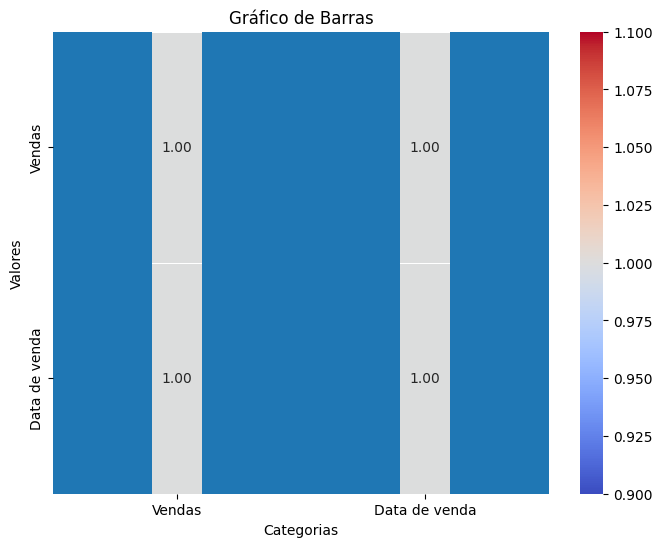

In [ ]:
#mudando nome das colunas
df = df.rename(columns={'Sales': 'Vendas', 'Order Date': 'Data de venda'})
# gráfico de calor
itens = ['Vendas','Data de venda']
plot_data = df[itens]

corr = plot_data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar=True)

categorias = ['A', 'B', 'C', 'D']
valores = [3, 7, 2, 5]

plt.bar(categorias, valores)
plt.title('Gráfico de Barras')
plt.xlabel('Categorias')
plt.ylabel('Valores')
plt.show()


2.Qual é a relação entre a venda dos produtos e a sua categoria?

In [ ]:
# Selecionando as colunas de interesse
item = ['Vendas', 'Category']
plot_data = df[item]
df['Category'] = df['Vendas'].astype(float)

In [ ]:
#Vendo a correlação entre preço e categoria
correlation = plot_data.corr()

          Sales  Category
Sales       1.0       1.0
Category    1.0       1.0


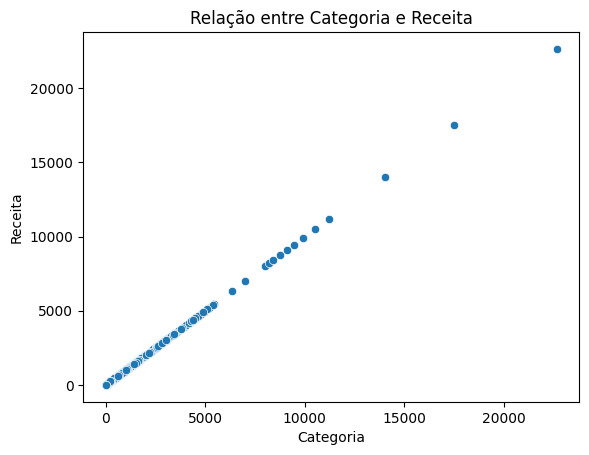

In [ ]:
sns.scatterplot(x='Category', y='Sales', data=df)
plt.title('Relação entre Categoria e Receita')
plt.xlabel('Categoria')
plt.ylabel('Receita')
plt.show()

3.Qual é a distribuição de vendas por modo de envio?

In [ ]:
# Agrupar as vendas por modo de envio
Venda_por_metódo = df.groupby('Ship Mode')['Vendas'].sum().reset_index()

<ipython-input-90-72d5c13905b9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Ship Mode', y='Vendas', data=Venda_por_metódo, palette='Set2')


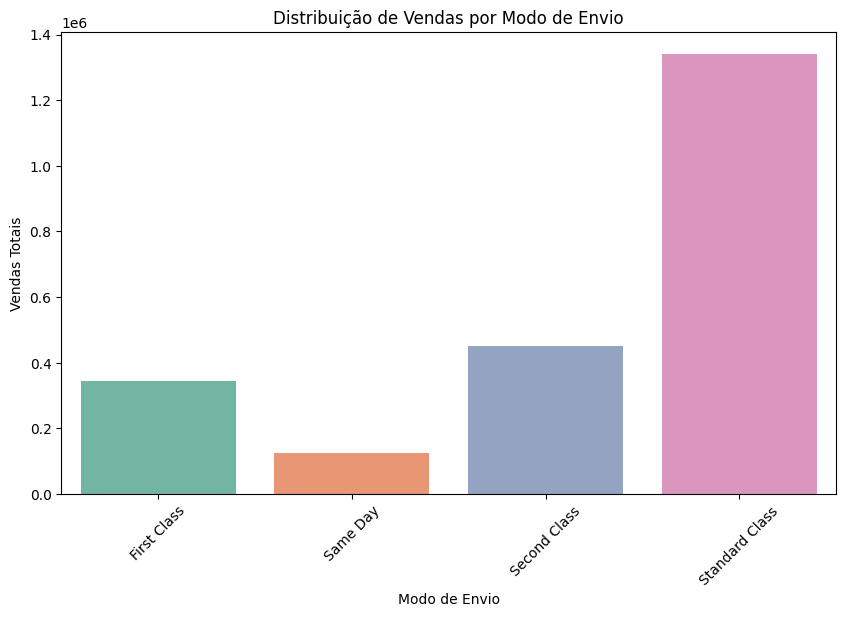

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Ship Mode', y='Vendas', data=Venda_por_metódo, palette='Set2')
plt.title('Distribuição de Vendas por Modo de Envio')
plt.xlabel('Modo de Envio')
plt.ylabel('Vendas Totais')
plt.xticks(rotation=45)
plt.show()